In [143]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Wczytanie zbioru Titanic
df = sns . load_dataset ("titanic")
print(df.shape)
print(df.head())
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve , roc_auc_score)
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

(891, 15)
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Część 1: Eksploracja Danych
Analiza danych - funkcja describe()

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

Analiza danych - funkcja info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sur

/tmp/ipython-input-1370503061.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival = df.groupby(['class', 'sex'])['survived'].mean().unstack()


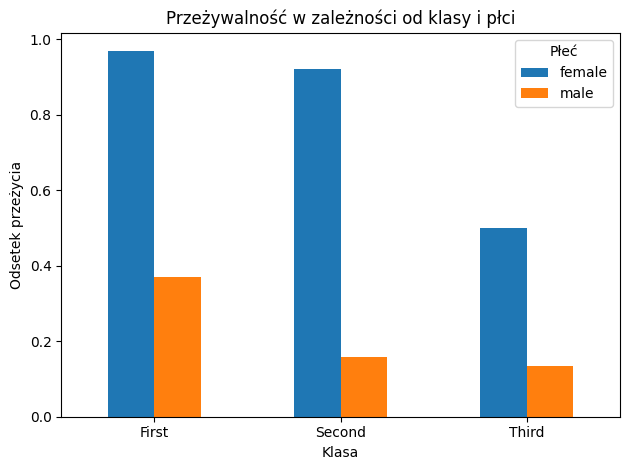

In [144]:
print("Część 1: Eksploracja Danych")

print("Analiza danych - funkcja describe()\n")
print(df.describe())
print("\nAnaliza danych - funkcja info()\n")
print(df.info())

print("\nAnaliza danych - liczba braków w kolumnach\n")
print(df.isna().sum())

alive = (df['survived'].sum() / len(df)) *100
dead = 100 - alive


print(f"\nOgółem przeżyło {alive:.2f}%, a zmarło {dead:.2f}% w tym:")
alive_woman = (df['survived'].sum() / len(df)) *100
dead = 100 - alive

alive_women = df[(df['sex'] == 'female') & (df['survived'] == 1)].shape[0]
total_women = df[df['sex'] == 'female'].shape[0]
alive_women_pct = (alive_women / total_women) * 100
dead_women_pct = 100 - alive_women_pct

print(f"Przeżyło {alive_women_pct:.2f}% kobiet, a zmarło {dead_women_pct:.2f}% kobiet")

alive_men = df[(df['sex'] == 'male') & (df['survived'] == 1)].shape[0]
total_men = df[df['sex'] == 'male'].shape[0]
alive_men_pct = (alive_men / total_men) * 100
dead_men_pct = 100 - alive_men_pct

print(f"Przeżyło {alive_men_pct:.2f}% mężczyzn, a zmarło {dead_men_pct:.2f}% mężczyzn")

alive_first = df[(df['class'] == 'First') & (df['survived'] == 1)].shape[0]
total_first = df[df['class'] == 'First'].shape[0]
alive_first_pct = (alive_first / total_first) * 100
dead_first_pct = 100 - alive_first_pct

print(f"Przeżyło {alive_first_pct:.2f}% osób z pierwszej klasy, a zmarło {dead_first_pct:.2f}%")

alive_second = df[(df['class'] == 'Second') & (df['survived'] == 1)].shape[0]
total_second = df[df['class'] == 'Second'].shape[0]
alive_second_pct = (alive_second / total_second) * 100
dead_second_pct = 100 - alive_second_pct

print(f"Przeżyło {alive_second_pct:.2f}% osób z drugiej klasy, a zmarło {dead_second_pct:.2f}%")

alive_third = df[(df['class'] == 'Third') & (df['survived'] == 1)].shape[0]
total_third = df[df['class'] == 'Third'].shape[0]
alive_third_pct = (alive_third / total_third) * 100
dead_third_pct = 100 - alive_third_pct

print(f"Przeżyło {alive_third_pct:.2f}% osób z trzeciej klasy, a zmarło {dead_third_pct:.2f}%")

survival = df.groupby(['class', 'sex'])['survived'].mean().unstack()
survival.plot(kind='bar')
plt.title('Przeżywalność w zależności od klasy i płci')
plt.xlabel('Klasa')
plt.ylabel('Odsetek przeżycia')
plt.legend(title='Płeć')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [145]:
print("Część 2: Przygotowanie Danych")

df.drop(columns=['deck'], inplace=True)
df.drop(columns=['adult_male'], inplace=True)
df.drop(columns=['who'], inplace=True)
df.drop(columns=['embark_town'], inplace=True)
df.drop(columns=['alive'], inplace=True)
print(df.columns)
df['age']=df.age.fillna(df.age.median())

df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])

categorical_cols = [
    'sex',
    'embarked',
    'class',
    'pclass'
]

df_encoded = pd.get_dummies(
    df,
    columns=categorical_cols,
    drop_first=True
)

print(df_encoded.columns)

X = df_encoded.drop(columns=['survived'])
y = df_encoded['survived']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print("Train:")
print(y_train.value_counts(normalize=True))

print("\nTest:")
print(y_test.value_counts(normalize=True))

Część 2: Przygotowanie Danych
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'alone'],
      dtype='object')
Index(['survived', 'age', 'sibsp', 'parch', 'fare', 'alone', 'sex_male',
       'embarked_Q', 'embarked_S', 'class_Second', 'class_Third', 'pclass_2',
       'pclass_3'],
      dtype='object')
Train:
survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64

Test:
survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


In [146]:
print("Część 3: Budowa modelu\n")
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print (" Wyraz wolny :", model.intercept_)
print (" Wspolczynniki :", model.coef_ )
for nazwa, beta in zip(X.columns, model.coef_[0]) :
  odds_ratio = np.exp ( beta )
  print (f"{nazwa}: beta ={beta:.3f} , odds ratio ={odds_ratio:.3f}")

print("\nZ obliczonych współczynników dla zmiennych:")
print("     age - każdy dodatkowy rok życia zmniejsza szansę przeżycia o ok. 4%")
print("     fare - każdy dodatkowy funt zapłacony za bilet zwiększ szansę przeżycia 0 0,3%")
print("     class_Second, class_Third - osoba z drugiej klasy ma o ok. 35% mniejsze szanse na przeżycie niż osoba z pierwszej, a osoba z trzeciej o 63% mniejsze niż z pierwszej")

print("\nZ odds ratio dla zmiennej sex, która została zmieniona na zmienną sex_male wynika że")
print("     kobieta ma o ok 92% większe szanse na przeżycie")

Część 3: Budowa modelu

 Wyraz wolny : [4.06024809]
 Wspolczynniki : [[-0.03634678 -0.39498467 -0.20033943  0.00258043 -0.58790994 -2.47685038
   0.33889397 -0.35243973 -0.42560702 -0.99209433 -0.42560702 -0.99209433]]
age: beta =-0.036 , odds ratio =0.964
sibsp: beta =-0.395 , odds ratio =0.674
parch: beta =-0.200 , odds ratio =0.818
fare: beta =0.003 , odds ratio =1.003
alone: beta =-0.588 , odds ratio =0.555
sex_male: beta =-2.477 , odds ratio =0.084
embarked_Q: beta =0.339 , odds ratio =1.403
embarked_S: beta =-0.352 , odds ratio =0.703
class_Second: beta =-0.426 , odds ratio =0.653
class_Third: beta =-0.992 , odds ratio =0.371
pclass_2: beta =-0.426 , odds ratio =0.653
pclass_3: beta =-0.992 , odds ratio =0.371

Z obliczonych współczynników dla zmiennych:
     age - każdy dodatkowy rok życia zmniejsza szansę przeżycia o ok. 4%
     fare - każdy dodatkowy funt zapłacony za bilet zwiększ szansę przeżycia 0 0,3%
     class_Second, class_Third - osoba z drugiej klasy ma o ok. 35% mnie

Część 4: Ewaluacja modelu



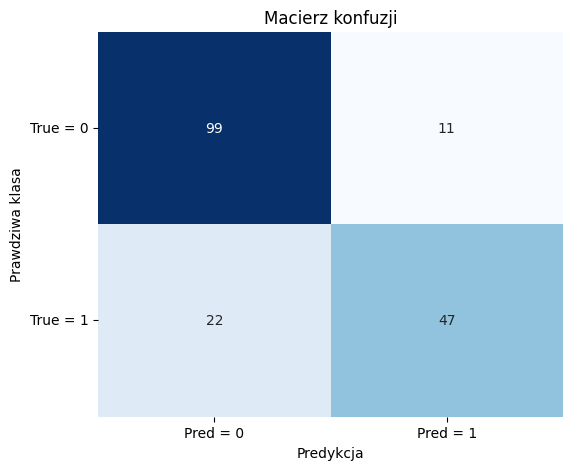


Dokładność: 0.8156424581005587
Dokładność informuje o odsetku poprawnych przewidywań

Precyzja: 0.8103448275862069
Precyzja informuje o odsetku osób, które model przewidział jako ocalałe i które faktycznie przeżyło. Innymi słowy pokazuje jak często ktoś przeżył, gdy model mówił, że przeżył

Czułość: 0.6811594202898551
Czułość informuje o odsetku prawidłowych predykcji, dla ogółu ocalałych osób. Innymi słowy jak często model poprawnie stwierdzał przeżycie.

Swoistość: 0.9
Swoistość informuje o odsetku prawidłowych predykcji, dla ogółu zmarłych osób. Innymi słowy jak często model poprawnie stwierdzał zgon.

F1: 0.7401574803149606
F1 informuje o kompromisie między dokładnością a czułością, im wyższa wartość tym lepszy model

AUC: 0.8509881422924901


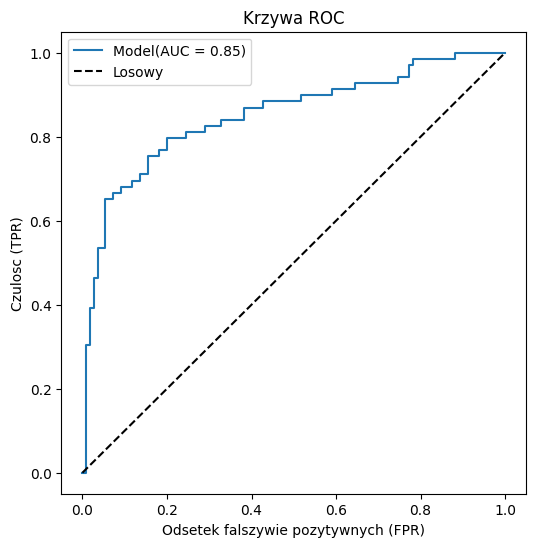

In [147]:
print("Część 4: Ewaluacja modelu\n")
y_pred = model.predict (X_test)
y_prob = model.predict_proba(X_test) [: , 1]
cm = confusion_matrix(y_test, y_pred)
pn, fp, fn, pp = cm.ravel()
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predykcja')
plt.ylabel('Prawdziwa klasa')
plt.title('Macierz konfuzji')
plt.xticks([0.5,1.5], ['Pred = 0', 'Pred = 1'])
plt.yticks([0.5,1.5], ['True = 0', 'True = 1'], rotation=0)
plt.show()

print ("\nDokładność:", accuracy_score(y_test, y_pred))
print("Dokładność informuje o odsetku poprawnych przewidywań\n")
print ("Precyzja:", precision_score(y_test, y_pred))
print("Precyzja informuje o odsetku osób, które model przewidział jako ocalałe i które faktycznie przeżyło. Innymi słowy pokazuje jak często ktoś przeżył, gdy model mówił, że przeżył\n")
print ("Czułość:", recall_score(y_test, y_pred))
print("Czułość informuje o odsetku prawidłowych predykcji, dla ogółu ocalałych osób. Innymi słowy jak często model poprawnie stwierdzał przeżycie.\n")
swoistosc = pn/(pn + fp)
print ("Swoistość:", swoistosc)
print("Swoistość informuje o odsetku prawidłowych predykcji, dla ogółu zmarłych osób. Innymi słowy jak często model poprawnie stwierdzał zgon.\n")
print ("F1:", f1_score(y_test, y_pred))
print("F1 informuje o kompromisie między dokładnością a czułością, im wyższa wartość tym lepszy model\n")
auc = roc_auc_score(y_test, y_prob)
print ("AUC:", auc)

fpr, tpr, thresholds = roc_curve(y_test , y_prob)

plt.figure(figsize=(6, 6))
plt.plot (fpr, tpr, label =f'Model(AUC = { auc:.2f})')
plt.plot ([0 , 1] ,[0 , 1] ,'k--', label ='Losowy')
plt.xlabel ('Odsetek falszywie pozytywnych (FPR)')
plt.ylabel ('Czulosc (TPR)')
plt.title ('Krzywa ROC')
plt.legend()
plt.show()

Dla powyższego modelu najważniejszą metryką jest czułość. Zależy nam na tym, aby poprawnie odnaleźć osoby ocalałe - nie chcemy pominąć nikogo kto ocalał w katastrofie.

In [148]:
print("Część 5: Eksperymenty\n")
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
y_prob = model.predict_proba(X_test)[:, 1]

print("Próg | Precyzja | Czułość")
for thresh in thresholds:
    y_pred_thresh = (y_prob >= thresh).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    print(f"{thresh:.1f} | {precision:.3f}    | {recall:.3f}")


model_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')
model_balanced.fit(X_train, y_train)
y_pred_bal = model_balanced.predict(X_test)
y_prob_bal = model_balanced.predict_proba(X_test)[:, 1]
cm_bal = confusion_matrix(y_test, y_pred_bal)
tn, fp, fn, tp = cm_bal.ravel()
swoistosc = tn / (tn + fp)

print("\nModel z class_weight='balanced'")
print("Macierz konfuzji:\n", cm_bal)
print("Dokładność:", accuracy_score(y_test, y_pred_bal))
print("Precyzja:", precision_score(y_test, y_pred_bal))
print("Czułość:", recall_score(y_test, y_pred_bal))
print("Swoistość:", swoistosc)
print("F1:", f1_score(y_test, y_pred_bal))
print("AUC:", roc_auc_score(y_test, y_prob_bal))
print("Model z class_weight='balanced' będzie przykładał większą wagę do klasy mniejszościowej (w tym przypadku do osób, które ocalały).")
print("Oznacza to, że w porównaniu z modelem bazowym wzrośnie czułość (model będzie bardziej nastawiony na poprawną odnalezienie osób ocalałych), a spadną dokładność i precyzja")

Część 5: Eksperymenty

Próg | Precyzja | Czułość
0.3 | 0.675    | 0.812
0.4 | 0.722    | 0.754
0.5 | 0.810    | 0.681
0.6 | 0.875    | 0.609
0.7 | 0.895    | 0.493

Model z class_weight='balanced'
Macierz konfuzji:
 [[90 20]
 [16 53]]
Dokładność: 0.7988826815642458
Precyzja: 0.726027397260274
Czułość: 0.7681159420289855
Swoistość: 0.8181818181818182
F1: 0.7464788732394366
AUC: 0.8515151515151516
Model z class_weight='balanced' będzie przykładał większą wagę do klasy mniejszościowej (w tym przypadku do osób, które ocalały).
Oznacza to, że w porównaniu z modelem bazowym wzrośnie czułość (model będzie bardziej nastawiony na poprawną odnalezienie osób ocalałych), a spadną dokładność i precyzja


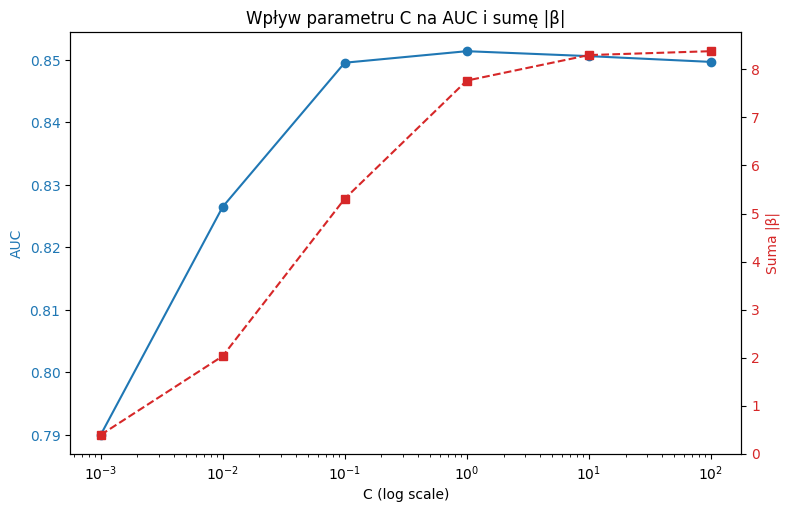

         feature   L2_coef   L1_coef
0            age -0.346642 -0.210873
1          sibsp -0.304768 -0.163796
2          parch -0.093185  0.000000
3           fare  0.261926  0.343706
4          alone -0.414548  0.000000
5       sex_male -1.798343 -1.916207
6     embarked_Q  0.163440  0.000000
7     embarked_S -0.344530  0.000000
8   class_Second -0.158753  0.000000
9    class_Third -0.631291 -0.467690
10      pclass_2 -0.158753  0.000000
11      pclass_3 -0.631291 -0.251942


In [149]:
num_cols = ['age', 'sibsp', 'parch', 'fare']

scaler = ColumnTransformer([
    ('num', StandardScaler(), num_cols)
], remainder='passthrough')

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C_values = [0.001, 0.01, 0.1, 1, 10, 100]
auc_list = []
coef_sum_list = []

for C in C_values:
    model = LogisticRegression(penalty='l2', C=C, max_iter=1000)
    model.fit(X_train_scaled, y_train)

    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    auc_list.append(auc)

    coef_sum = np.sum(np.abs(model.coef_))
    coef_sum_list.append(coef_sum)

fig, ax1 = plt.subplots(figsize=(8,5))

color = 'tab:blue'
ax1.set_xlabel('C (log scale)')
ax1.set_xscale('log')
ax1.set_ylabel('AUC', color=color)
ax1.plot(C_values, auc_list, 'o-', color=color, label='AUC')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Suma |β|', color=color)
ax2.plot(C_values, coef_sum_list, 's--', color=color, label='Suma |β|')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Wpływ parametru C na AUC i sumę |β|')
plt.show()

model_l2 = LogisticRegression(penalty='l2', C=0.1, max_iter=1000)
model_l2.fit(X_train_scaled, y_train)

model_l1 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', max_iter=1000)
model_l1.fit(X_train_scaled, y_train)

coef_comparison = pd.DataFrame({
    'feature': X_train.columns,
    'L2_coef': model_l2.coef_[0],
    'L1_coef': model_l1.coef_[0]
})

print(coef_comparison)